In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Column names from the word document "Network Anamoly Detection" for the dataset
column_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

dataset = pd.read_csv("../Data/Train.txt", names=column_names)

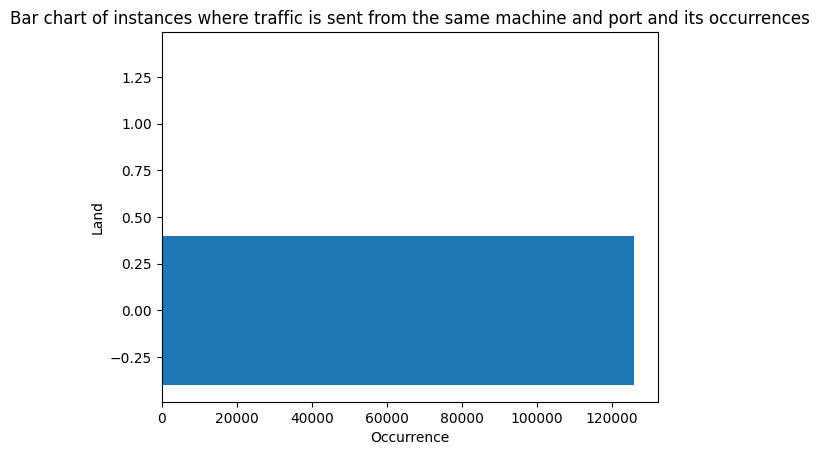

Occurrence and  their occurrences
0 - 125948
1 - 25


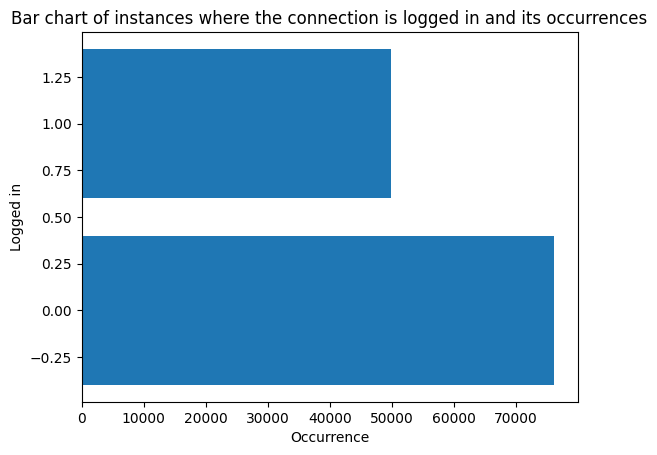

Occurrence and  their occurrences
0 - 76121
1 - 49852


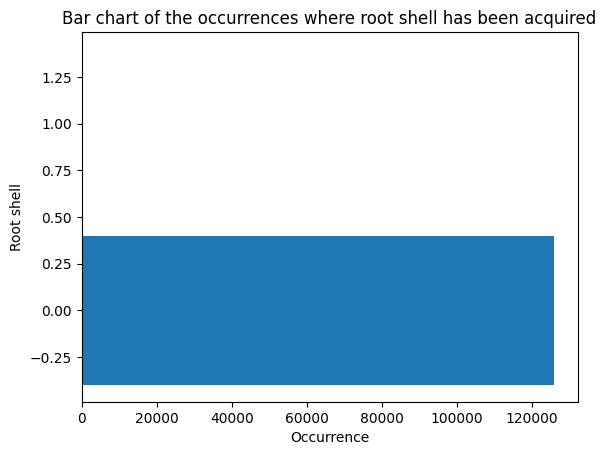

Occurrence and  their occurrences
0 - 125804
1 - 169


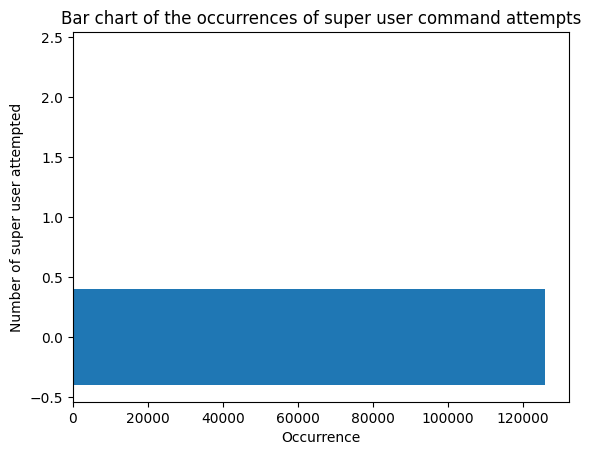

Occurrence and  their occurrences
0 - 125893
1 - 21
2 - 59


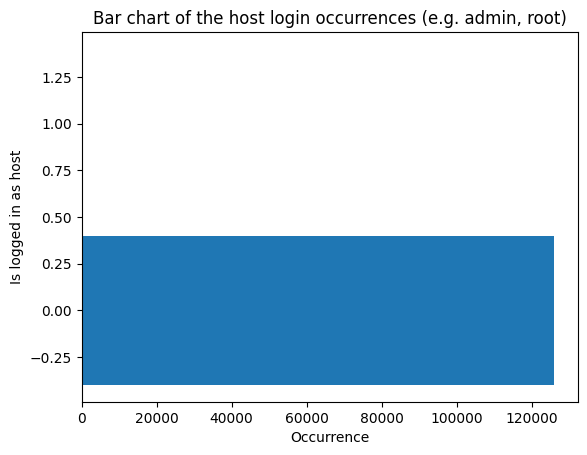

Occurrence and  their occurrences
0 - 125972
1 - 1


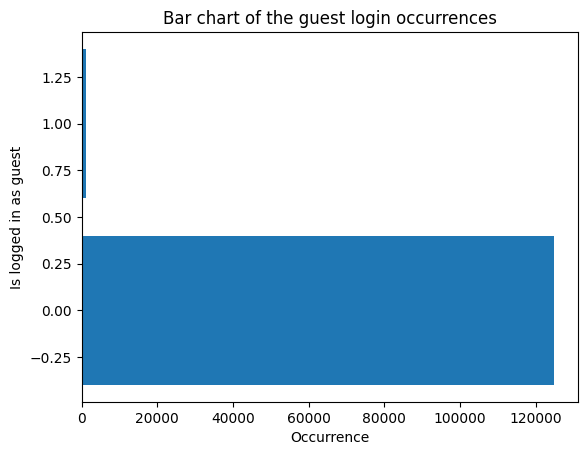

Occurrence and  their occurrences
0 - 124786
1 - 1187


In [5]:
def occurence_barchart_plot(column, xlabel, ylabel, title, graphs):
    labels, values = np.unique(dataset[column], return_counts=True)
    highest_value = max(values)
    labels_split = np.split(labels, graphs)
    values_split = np.split(values, graphs)
    
    for index in range(len(labels_split)):
        plt.barh(labels_split[index], values_split[index], align="center")
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        if len(labels_split) > 1:
            plt.title(f"{title} part {index+1}")
        else:
            plt.title(title)
        plt.xlim(0, highest_value + (highest_value * 0.05))
        plt.show()

    print(f"{xlabel} and  their occurrences")
    for i in range(0, len(labels)):
        print(labels[i], "-",  values[i])

#Binary features
#from the occurence of it is sufficiently little difference to the point of possibly disregarded, must be be investigated with the attack class
occurence_barchart_plot("land", "Occurrence", "Land", "Bar chart of instances where traffic is sent from the same machine and port and its occurrences", 1)
occurence_barchart_plot("logged_in", "Occurrence", "Logged in", "Bar chart of instances where the connection is logged in and its occurrences", 1)

#little occurrence but still good to keep
occurence_barchart_plot("root_shell", "Occurrence", "Root shell", "Bar chart of the occurrences where root shell has been acquired", 1)

# typically maxes out at 2
occurence_barchart_plot("su_attempted", "Occurrence", "Number of super user attempted", "Bar chart of the occurrences of super user command attempts", 1)

# To little variance in the data (only one occurence of the host being logged in)
occurence_barchart_plot("is_host_login", "Occurrence", "Is logged in as host", "Bar chart of the host login occurrences (e.g. admin, root)", 1)

#little occurrence but still good to keep
occurence_barchart_plot("is_guest_login", "Occurrence", "Is logged in as guest", "Bar chart of the guest login occurrences", 1)